In [328]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [329]:
#importing or loading the train dataset
df = pd.read_csv(r'C:\Users\Shashanka S\Desktop\evaluation projects\avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 
Content

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold
    4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

In [330]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [331]:
#Removing additional index column
df = df.drop(['Unnamed: 0'], axis=1)

In [332]:
#Checkin for data shape
df.shape

(18249, 13)

In [333]:
#Checking data types
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

'AveragePrice', 'Total Volume', '4046', '4225','4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags' all are of continuous type of data feature columns

Region and type are of categorical type

Time and date is of ordinal typr of data (categorical in nature)

In [334]:
#Checking any null values
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [335]:
#Checking any blank or white spaces
np.where(df.applymap(lambda x: x == ' '))

(array([], dtype=int64), array([], dtype=int64))

No blank spaces as entries present

In [336]:
#Checking if all entries of a column is unique or not
for i in df.columns:
    print('For column of {} :'.format(i),(len(df[i].unique())==len(df[i])))

For column of Date : False
For column of AveragePrice : False
For column of Total Volume : False
For column of 4046 : False
For column of 4225 : False
For column of 4770 : False
For column of Total Bags : False
For column of Small Bags : False
For column of Large Bags : False
For column of XLarge Bags : False
For column of type : False
For column of year : False
For column of region : False


All of the columns has some repeated values and no column is having complete unique entries in them

In [337]:
#Removing duplicate rows if any
print('Size before: ',df.shape)
df.drop_duplicates()
print('Size after: ',df.shape)

Size before:  (18249, 13)
Size after:  (18249, 13)


Therefore no duplicate rows present in the dataset

In [338]:
#Checking of value counts in each columns having categorical/ordinal input features
df_cat = df[['Date','year','type']]
for i in df_cat.columns:
    print(df_cat[i].value_counts(),'\n')

2017-08-13    108
2018-03-04    108
2017-10-15    108
2015-01-18    108
2015-10-11    108
             ... 
2016-07-17    108
2016-11-06    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64 

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64 

conventional    9126
organic         9123
Name: type, dtype: int64 



Categorical data seems to be balanced 

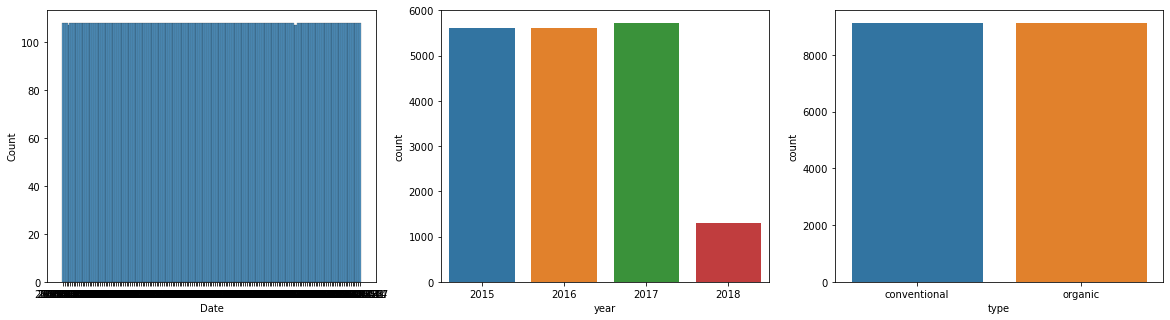

In [339]:
#Vizualization of count/histogram of categorical/discrete input feature columns
plt.figure(figsize=(20,5))
ax = plt.subplot(1,3,1)
sns.histplot(df['Date'], bins=20)
ax = plt.subplot(1,3,2)
sns.countplot(df['year'])
ax = plt.subplot(1,3,3)
sns.countplot(df['type'])
plt.show()

As per available data for the year 2018 less number of data available

Conventional and organic type of fruits are of almost equal proportion

For each of the available dates on an average 107.5 data avalable regarding avocado consumption

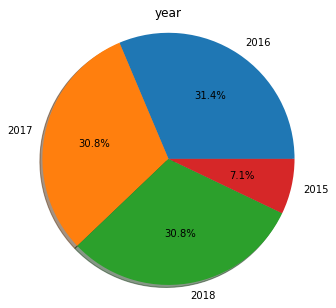

In [340]:
#Vizualization of year data
var = 'year'
plt.figure(figsize=(5,5))
data = list(df[var].value_counts())
plt.pie(data, labels= list(set(df[var].values)), autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('year')
plt.show()

Pie chart vizualization of year shows that maximum number of data available from 2017 and 2018

Less number of data available from 2018

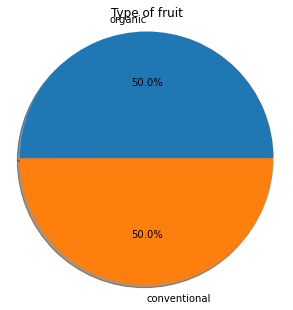

In [341]:
#Vizualization fruit type data
var = 'type'
plt.figure(figsize=(5,5))
data = list(df[var].value_counts())
plt.pie(data, labels= list(set(df[var].values)), autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Type of fruit')
plt.show()

Pie chart vizualization of year shows that equal and balanced proportion of both types of fruit data present in dataset

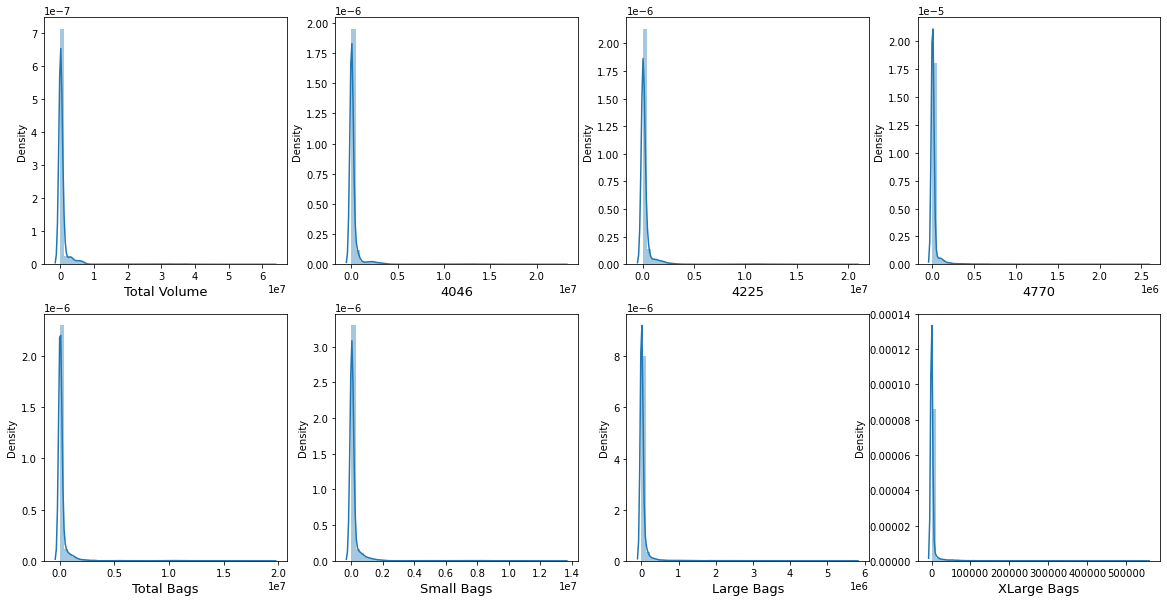

In [342]:
#Checking of value counts in each columns having continuous input features
df_cont = df[['Total Volume', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]
plt.figure(figsize=(20,10))
pltno = 1
for columns in df_cont:
    if pltno <=16:
        ax = plt.subplot(2,4,pltno)
        sns.distplot(df_cont[columns])
        plt.xlabel(columns, fontsize=13)       
    pltno += 1
plt.show()

Distribution of each continuous data input features are highly right skewed

This skewness need to be handled before training the model

The data is distribution is in huge range 

even 50th percentile of data is very much smaller compared to maximun value of that column

This high skewness can be cross checked in statistical summary of data 

1) by observing difference between each quartile

2) by observing mean and standard deviation of each columns

3 sigma rule (z score) technique to be applied

In [343]:
#Checking of value counts in categorical output column
df['region'].value_counts()

SouthCarolina          338
Sacramento             338
BuffaloRochester       338
StLouis                338
RaleighGreensboro      338
Nashville              338
Northeast              338
LosAngeles             338
CincinnatiDayton       338
TotalUS                338
PhoenixTucson          338
BaltimoreWashington    338
Charlotte              338
Atlanta                338
Tampa                  338
West                   338
Plains                 338
Albany                 338
DallasFtWorth          338
Boston                 338
Detroit                338
Jacksonville           338
Orlando                338
HartfordSpringfield    338
Houston                338
California             338
SanFrancisco           338
SanDiego               338
Pittsburgh             338
Indianapolis           338
GrandRapids            338
Southeast              338
Denver                 338
RichmondNorfolk        338
Seattle                338
Portland               338
Chicago                338
L

Each category of output columns data is in same numbers. So the target or label is balanced. No need to apply balancing or sampling techniques

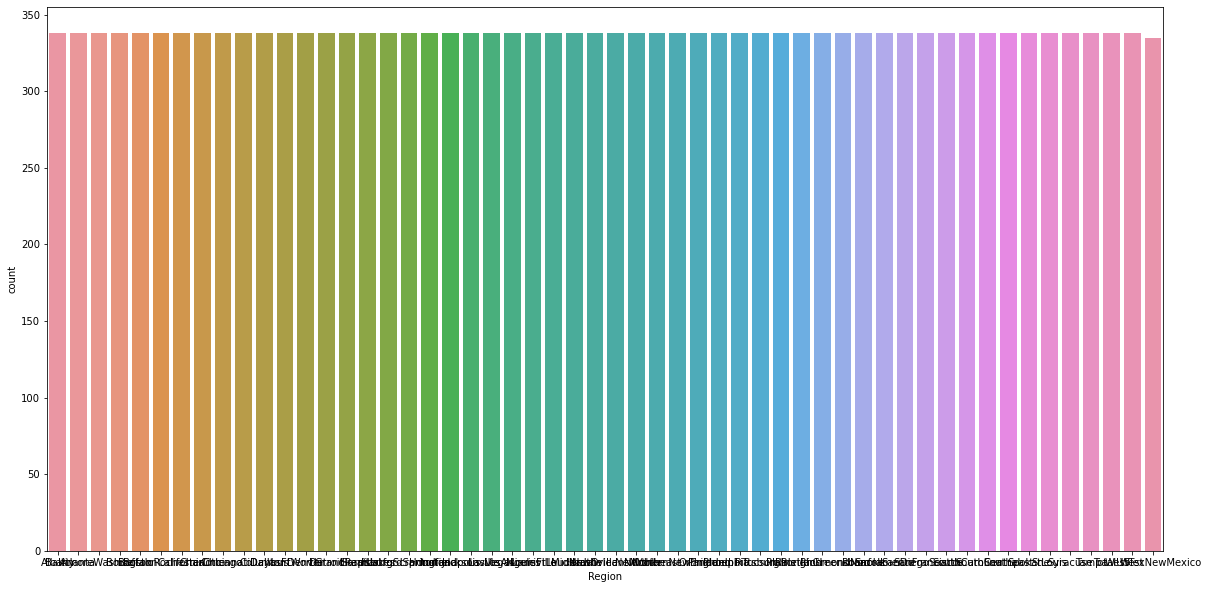

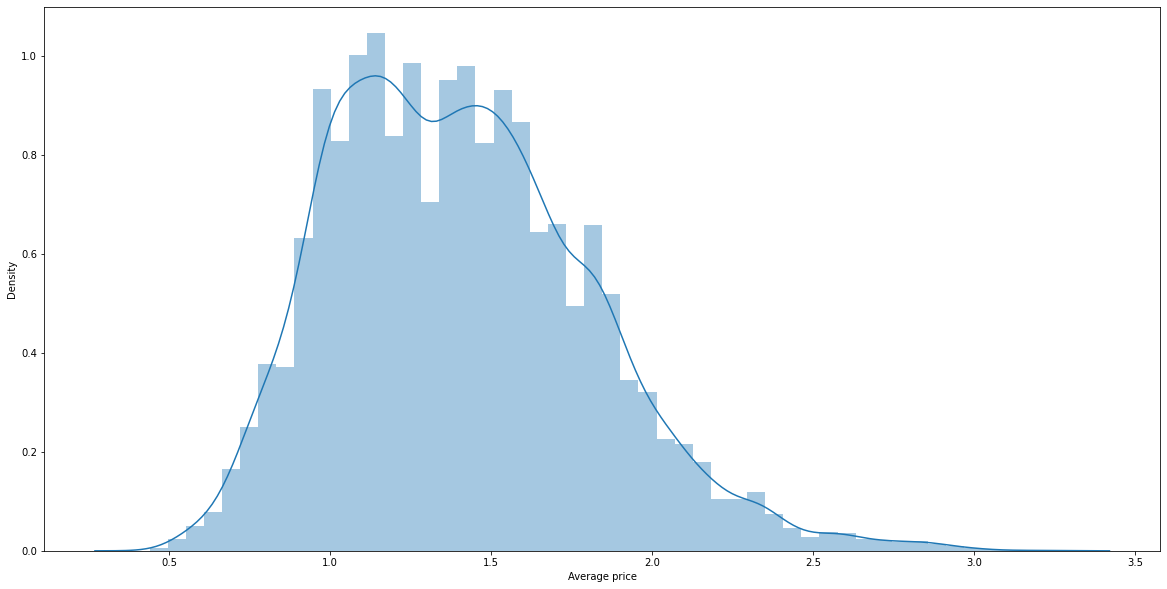

In [344]:
#Vizualization of distribution of categorical & continuous output column
plt.figure(figsize=(20,10))
sns.countplot(df['region'])
plt.xlabel('Region', fontsize=10) 
plt.show()

plt.figure(figsize=(20,10))
sns.distplot(df['AveragePrice'])
plt.xlabel('Average price', fontsize=10) 
plt.show()

Average price distribution is normally distributed with little right skewed data

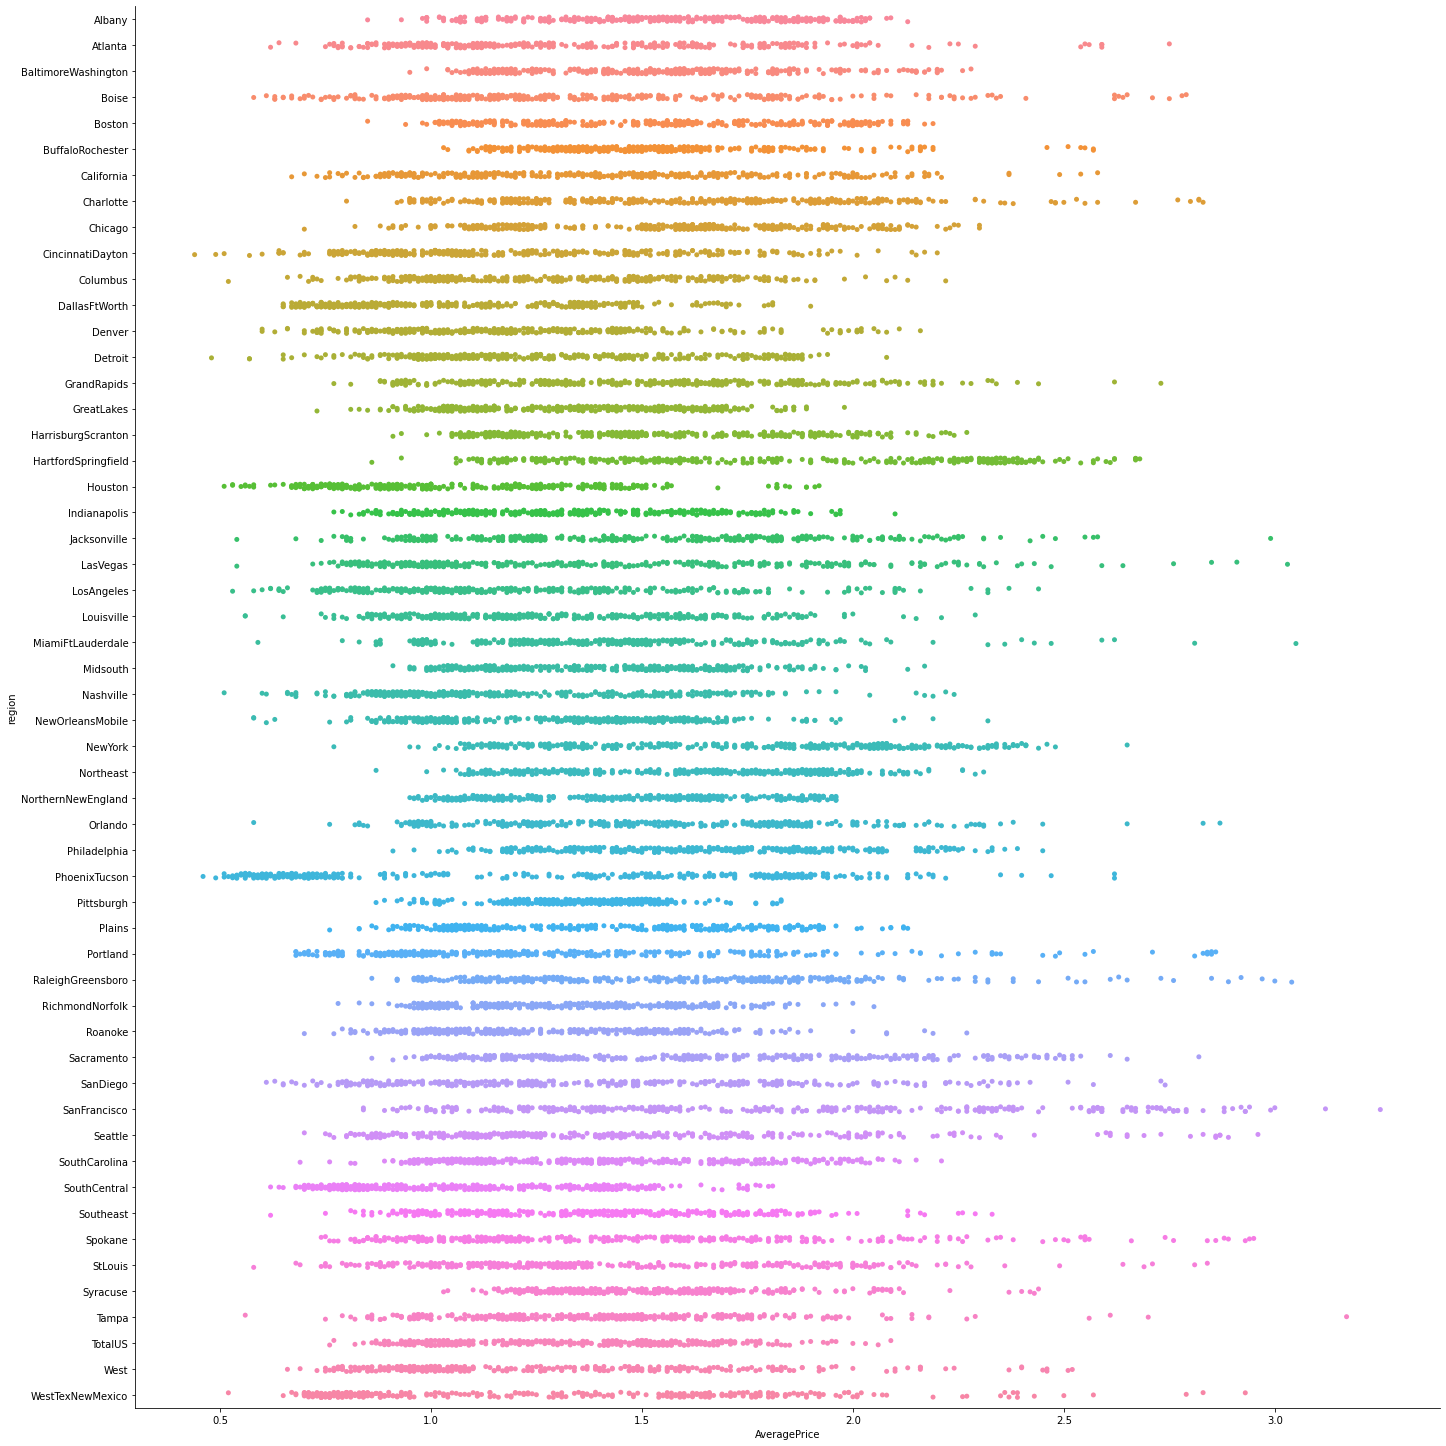

In [345]:
#Let us vizuaize how average price of fruits is distributed among different region
sns.catplot(y = 'region', x = 'AveragePrice', data=df, height=20)
plt.show()

From this graph we can observe that maximum average price has been reached in SanFrancisco region

Minimum average price has been reached in SanFrancisco region PhoenixTucson and CincinnatiDayton region

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64


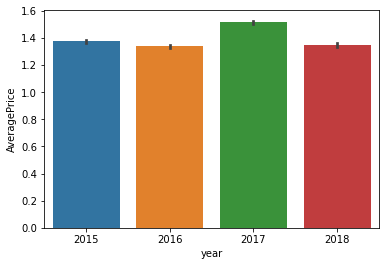

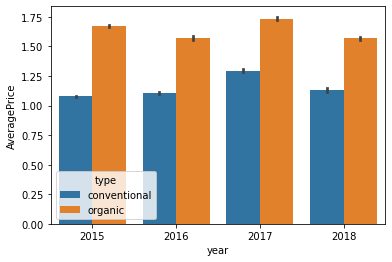

In [346]:
#Checking data about mean of average price of Avocado in each year
print(df.groupby('year')['AveragePrice'].mean())

#Vizualization of the same
sns.barplot(x = df['year'], y = df['AveragePrice'])
plt.show()

#Vizualization of the same based on type 
sns.barplot(x = df['year'], y = df['AveragePrice'], hue = df['type'])
plt.show()

1) Highest average price is observed in teh year 2017

2) Among the 2 types of avocado price of organic type found more irrespective of year

In [347]:
#Checking count of which type has been sold with respect to year
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

Almost same number of conventional and organic type of Avocado were sold in each year

In [348]:
#creating one more column of month for monthly data analysis
import datetime
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [349]:
#Checking data about mean of average price of Avocado in each month
df.groupby('Month')['AveragePrice'].mean()

Month
1     1.311019
2     1.274387
3     1.332255
4     1.374380
5     1.346601
6     1.408964
7     1.462077
8     1.512514
9     1.572654
10    1.579683
11    1.455563
12    1.331112
Name: AveragePrice, dtype: float64

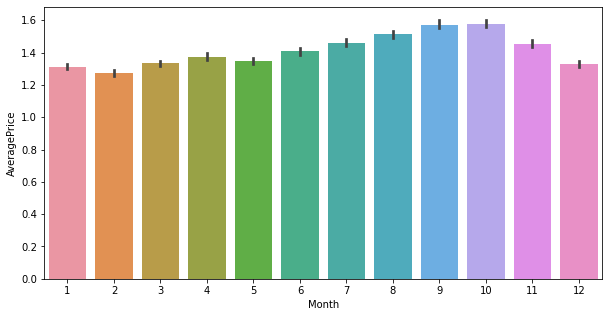

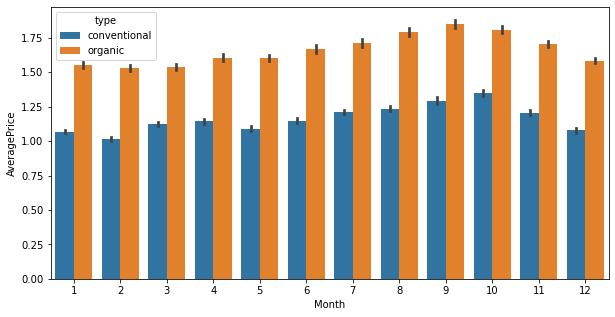

In [350]:
#Vizualization of monthly average price variation
plt.figure(figsize=(10,5))
sns.barplot(x = df['Month'], y = df['AveragePrice'])
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x = df['Month'], y = df['AveragePrice'], hue = df['type'])
plt.show()

1) During 10th month (October) of every year average price of avocado is more (1.579)

2) During 2nd month (February) of every year average price of avocado is more (1.27)

3) Irrespective of month of the year the average price of organic type is found more

In [351]:
#Checking data about type of Avocado in each month (season checking)
df.groupby('Month')['type'].value_counts()

Month  type        
1      conventional    972
       organic         972
2      conventional    864
       organic         864
3      conventional    918
       organic         918
4      conventional    702
       organic         702
5      conventional    756
       organic         756
6      conventional    648
       organic         646
7      conventional    756
       organic         756
8      conventional    702
       organic         702
9      conventional    648
       organic         648
10     conventional    756
       organic         756
11     conventional    702
       organic         702
12     conventional    702
       organic         701
Name: type, dtype: int64

Almost same number of conventional and organic type of Avocado were sold in each month of every year

year
2015    7.810274e+05
2016    8.584206e+05
2017    8.623393e+05
2018    1.066928e+06
Name: Total Volume, dtype: float64


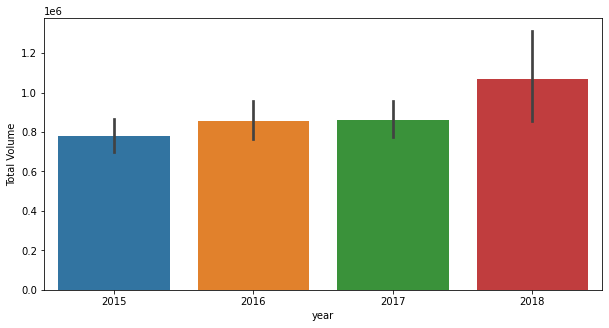

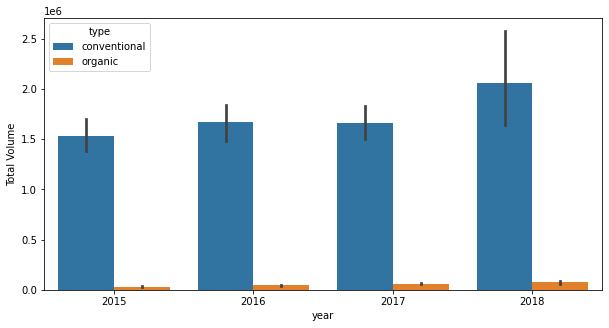

In [352]:
#Checking data about Total volume of Avocado in each year
print(df.groupby('year')['Total Volume'].mean())

#Vizualization of the same
plt.figure(figsize=(10,5))
sns.barplot(x = df['year'], y = df['Total Volume'])
plt.show()

#Vizualization of the same wrt type
plt.figure(figsize=(10,5))
sns.barplot(x = df['year'], y = df['Total Volume'], hue = df['type'])
plt.show()

1) Highest volume of avocado sold is in the year of 2018

2) Highest volume of avocado sold is of type conventional irrespective of the year

3) Highest volume of avocado sold is in the year of 2015

Month
1     9.035654e+05
2     1.018825e+06
3     8.845054e+05
4     8.801935e+05
5     9.727150e+05
6     9.293397e+05
7     8.590482e+05
8     8.036857e+05
9     7.533192e+05
10    6.803941e+05
11    6.796073e+05
12    7.746305e+05
Name: Total Volume, dtype: float64


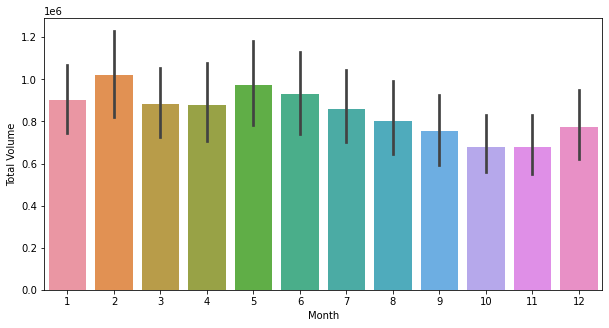

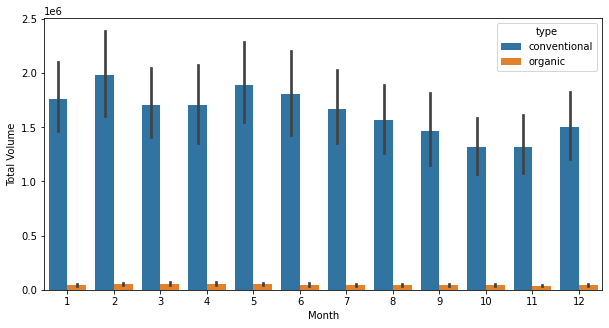

In [353]:
#Checking data about Total volume of Avocado in each month
print(df.groupby('Month')['Total Volume'].mean())

#Vizualization of the same
plt.figure(figsize=(10,5))
sns.barplot(x = df['Month'], y = df['Total Volume'])
plt.show()

#Vizualization of the same wrt type
plt.figure(figsize=(10,5))
sns.barplot(x = df['Month'], y = df['Total Volume'], hue = df['type'])
plt.show()

1) During 2nd month (February) of every year Total volume sold of avocado is more

2) During 11th month (November) of every year Total volume sold of avocado is more

3) Irrespective of month of the year the Total volume sold of organic type is found more

year
2015    137523.105437
2016    260533.986204
2017    287712.119423
2018    379271.564429
Name: Total Bags, dtype: float64


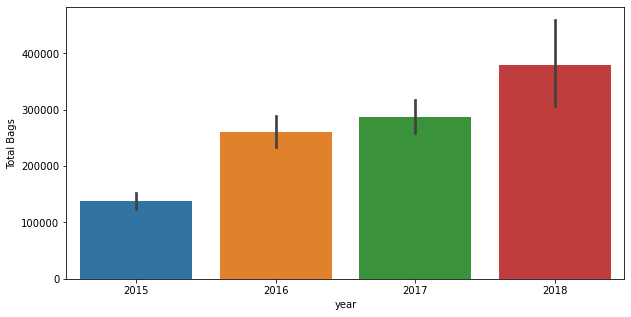

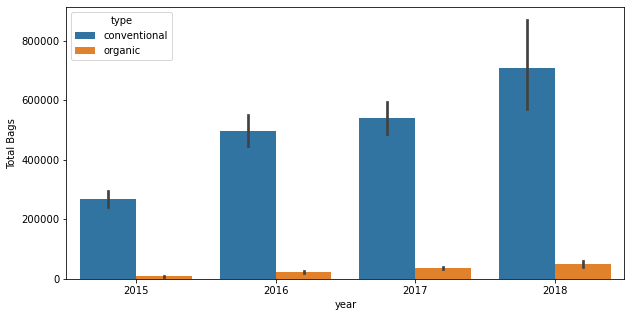

In [354]:
#Checking data about Total bags of Avocado in each year
print(df.groupby('year')['Total Bags'].mean())

#Vizualization of the same
plt.figure(figsize=(10,5))
sns.barplot(x = df['year'], y = df['Total Bags'])
plt.show()

#Vizualization of the same wrt type
plt.figure(figsize=(10,5))
sns.barplot(x = df['year'], y = df['Total Bags'], hue = df['type'])
plt.show()

1) Total bags of avocado sold is in the year of 2018

2) Total bags of avocado sold is of type conventional irrespective of the year

3) Total bags of avocado sold is in the year of 2015

Month
1     254693.975550
2     285196.078073
3     259658.362021
4     247878.811068
5     257710.995238
6     261208.611175
7     247558.728228
8     211092.107201
9     201618.164769
10    195964.540364
11    192921.858070
12    237829.212438
Name: Total Bags, dtype: float64


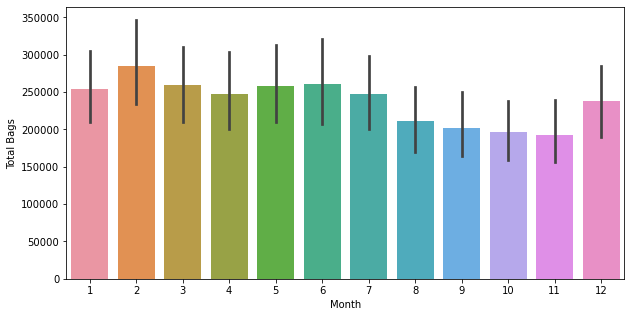

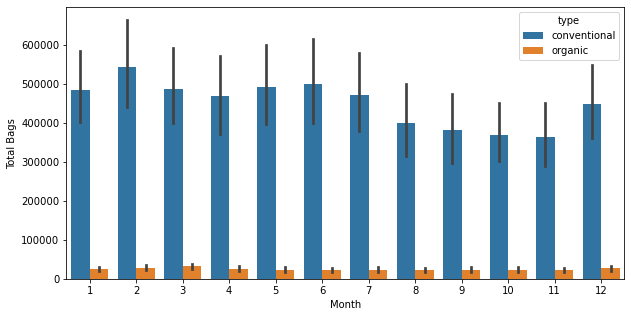

In [355]:
#Checking data about Total bags of Avocado in each month
print(df.groupby('Month')['Total Bags'].mean())

#Vizualization of the same
plt.figure(figsize=(10,5))
sns.barplot(x = df['Month'], y = df['Total Bags'])
plt.show()

#Vizualization of the same wrt type
plt.figure(figsize=(10,5))
sns.barplot(x = df['Month'], y = df['Total Bags'], hue = df['type'])
plt.show()

1) During 2nd month (February) of every year Total bags sold of avocado is more

2) During 11th month (November) of every year Total bags sold of avocado is more

3) Irrespective of month of the year the Total volume bags of organic type is found more

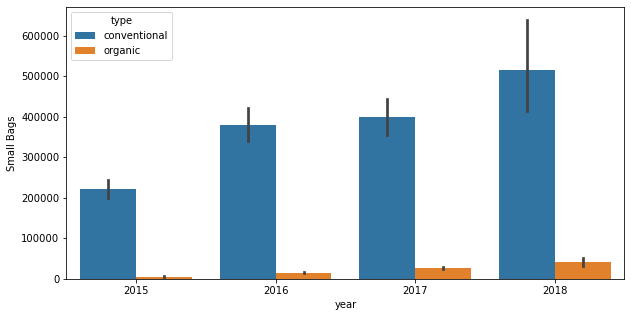

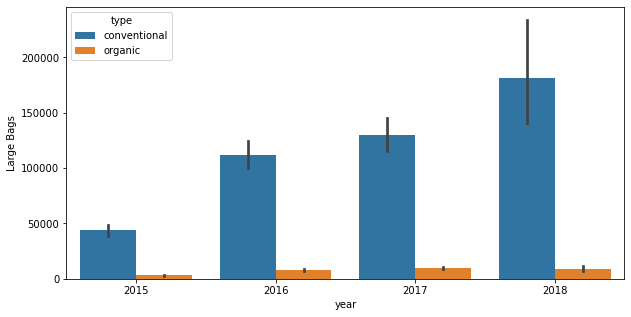

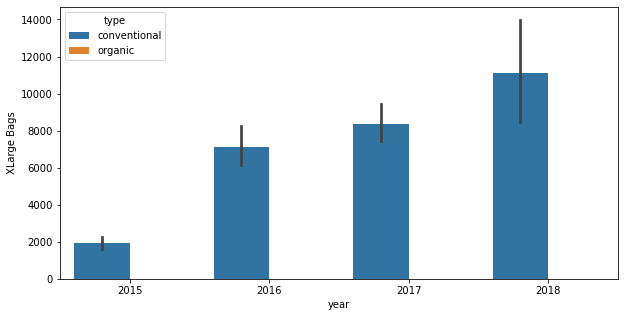

In [356]:
#Vizualization of 'Small Bags', 'Large Bags', 'XLarge Bags' wrt year and based on type
plt.figure(figsize=(10,5))
sns.barplot(x = df['year'], y = df['Small Bags'], hue = df['type'])
plt.show()
plt.figure(figsize=(10,5))
sns.barplot(x = df['year'], y = df['Large Bags'], hue = df['type'])
plt.show()
plt.figure(figsize=(10,5))
sns.barplot(x = df['year'], y = df['XLarge Bags'], hue = df['type'])
plt.show()

Similar observations found from different sizes of bags as of total bags

Under X large bags no organic type of avocado sold

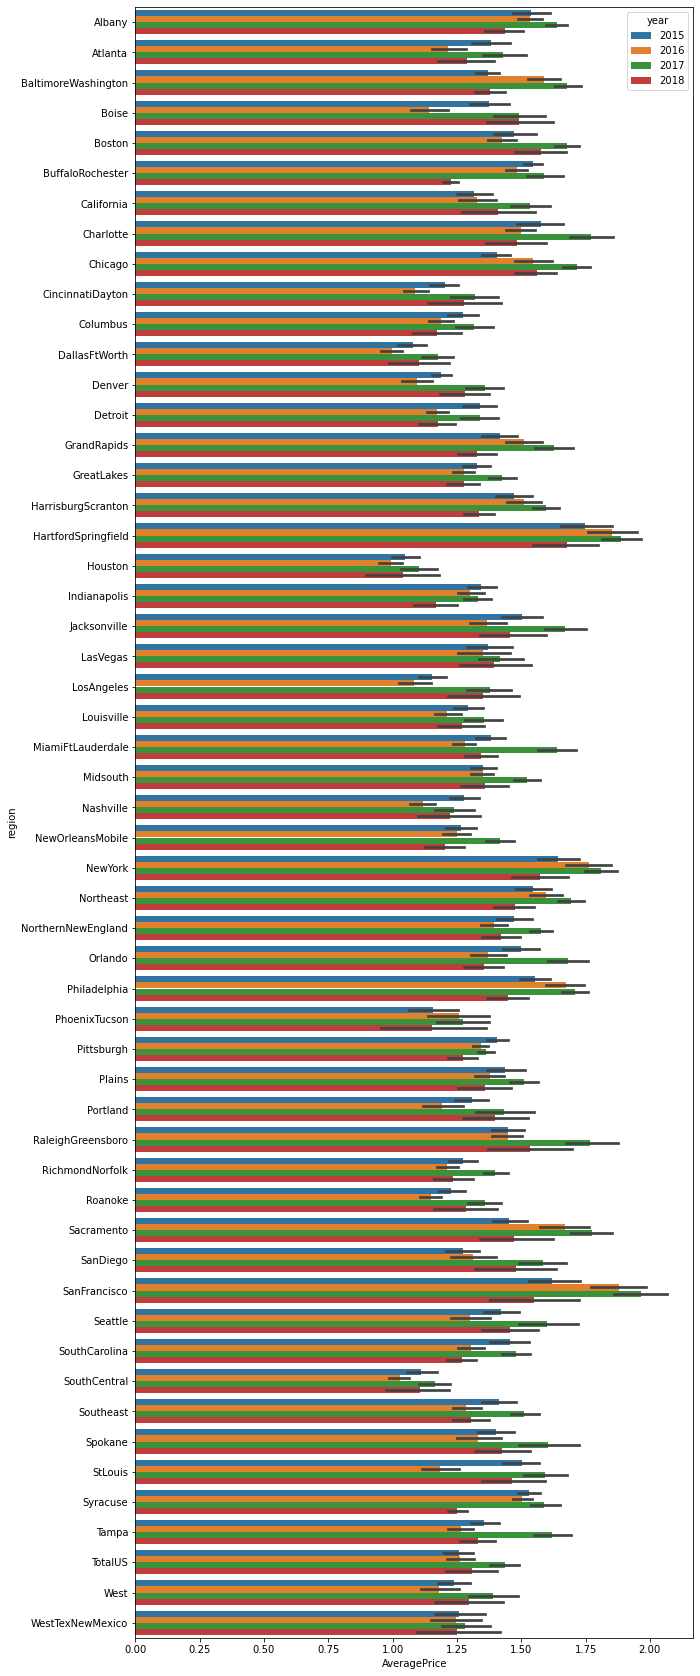

In [357]:
#Vizualization of aaverage price in different region in different years
plt.figure(figsize=(10,30))
sns.barplot(x = df['AveragePrice'], y = df['region'],  hue=df['year'])
plt.show()

We can observe in Sanfrancisco highest price reached in 2017, this is the highest of all

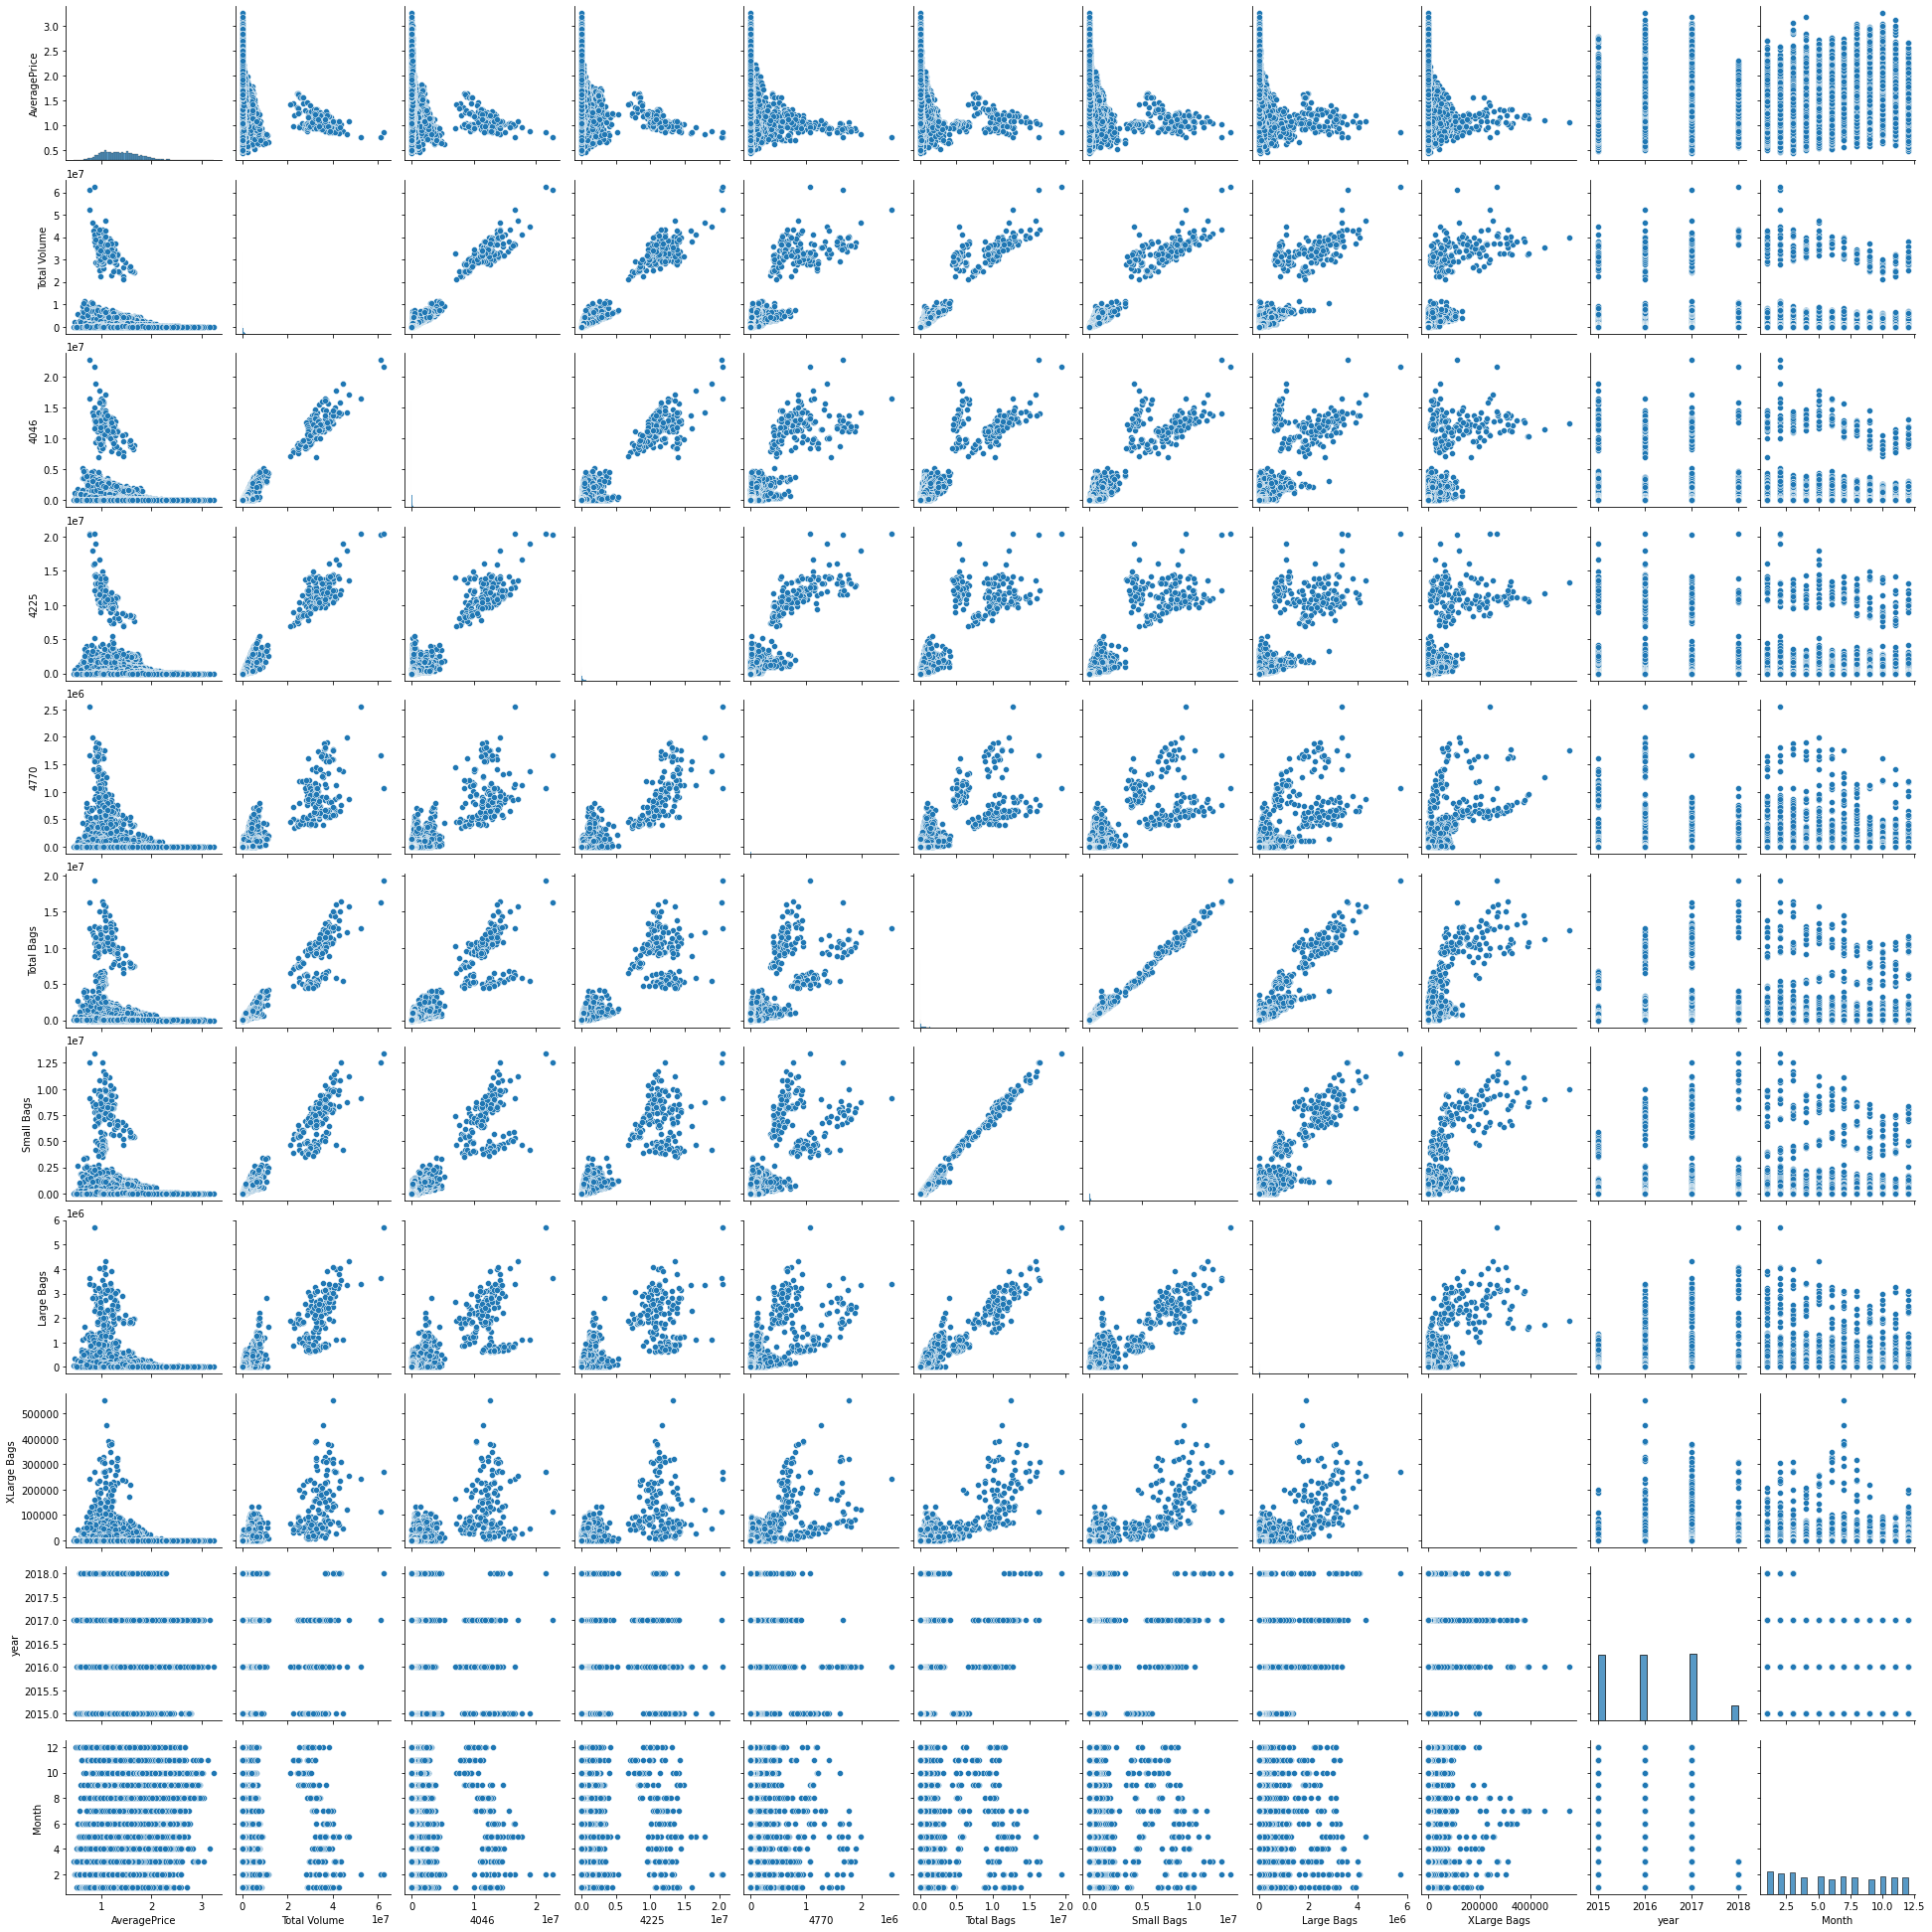

In [358]:
#Plotting all possible bivariate plots together
sns.pairplot(df)
plt.show()

We can observe many of the feature columns are showing correlation aon themselves as seen from pairplot

There is multicollinearity issue. This need to be handled before training the model

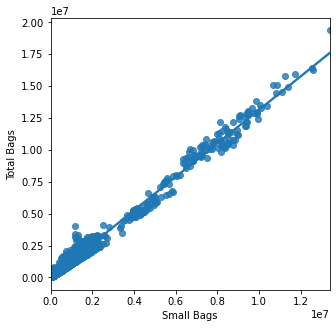

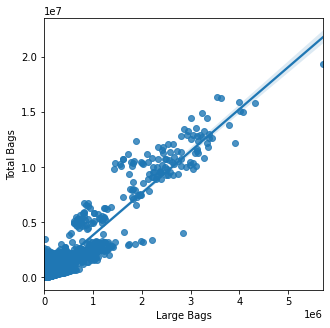

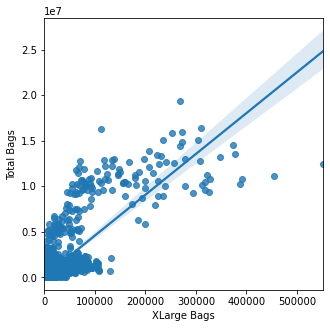

In [359]:
#Vizualization of 'Small Bags', 'Large Bags', 'XLarge Bags' correlation with total bags
plt.figure(figsize=(5,5))
sns.regplot(y = df['Total Bags'], x = df['Small Bags'])
plt.show()
plt.figure(figsize=(5,5))
sns.regplot(y = df['Total Bags'], x = df['Large Bags'])
plt.show()
plt.figure(figsize=(5,5))
sns.regplot(y = df['Total Bags'], x = df['XLarge Bags'])
plt.show()

Strong + correlation observed in all 3 graphs

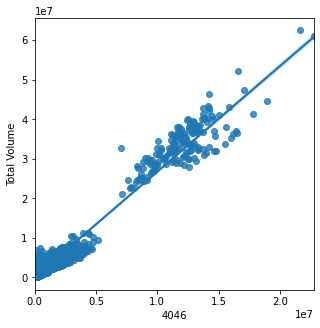

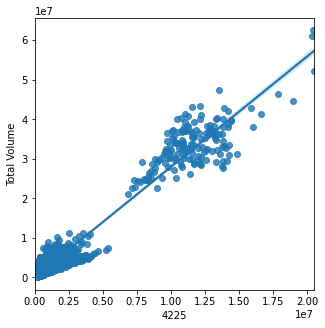

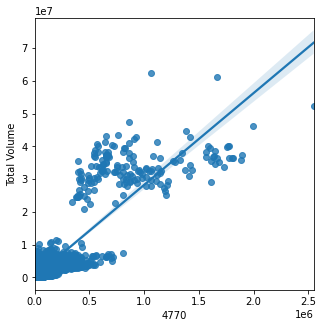

In [360]:
#Vizualization of '4046', '4225', '4770' correlation with total volume
plt.figure(figsize=(5,5))
sns.regplot(y = df['Total Volume'], x = df['4046'])
plt.show()
plt.figure(figsize=(5,5))
sns.regplot(y = df['Total Volume'], x = df['4225'])
plt.show()
plt.figure(figsize=(5,5))
sns.regplot(y = df['Total Volume'], x = df['4770'])
plt.show()

All 3 graphs are showing strong positive correlation. Multicollinearity need to be handled before model training

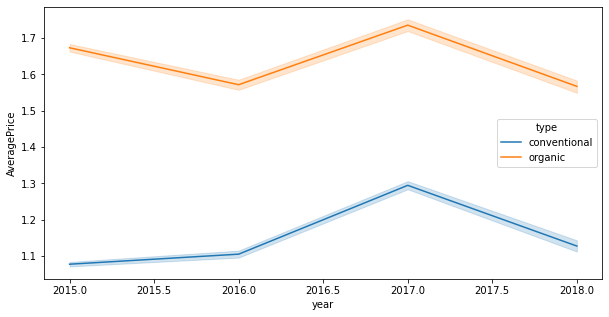

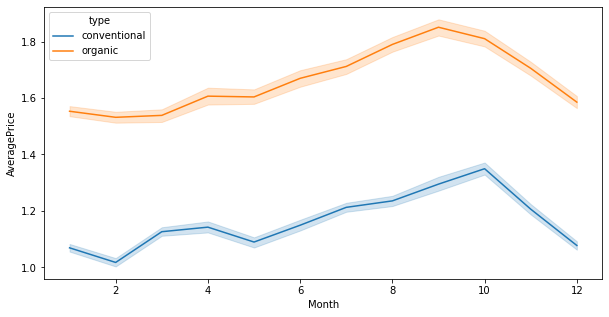

In [361]:
#Line plot vizualization of Average price based on year, month, type
plt.figure(figsize=(10,5))
sns.lineplot(y = df['AveragePrice'], x = df['year'], hue = df['type'])
plt.show()
plt.figure(figsize=(10,5))
sns.lineplot(y = df['AveragePrice'], x = df['Month'], hue = df['type'])
plt.show()

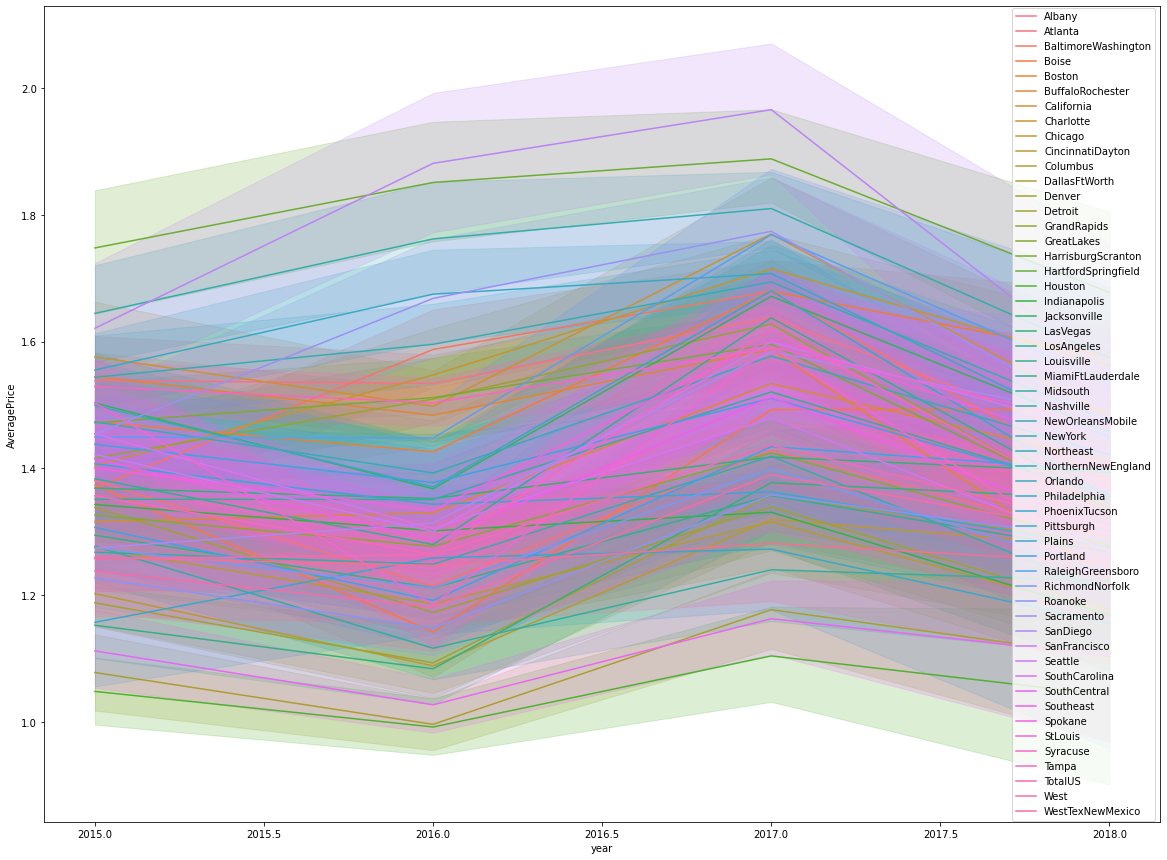

In [362]:
plt.figure(figsize=(20,15))
sns.lineplot(y = df['AveragePrice'], x = df['year'], hue = df['region'])
plt.legend(loc=7)
plt.show()

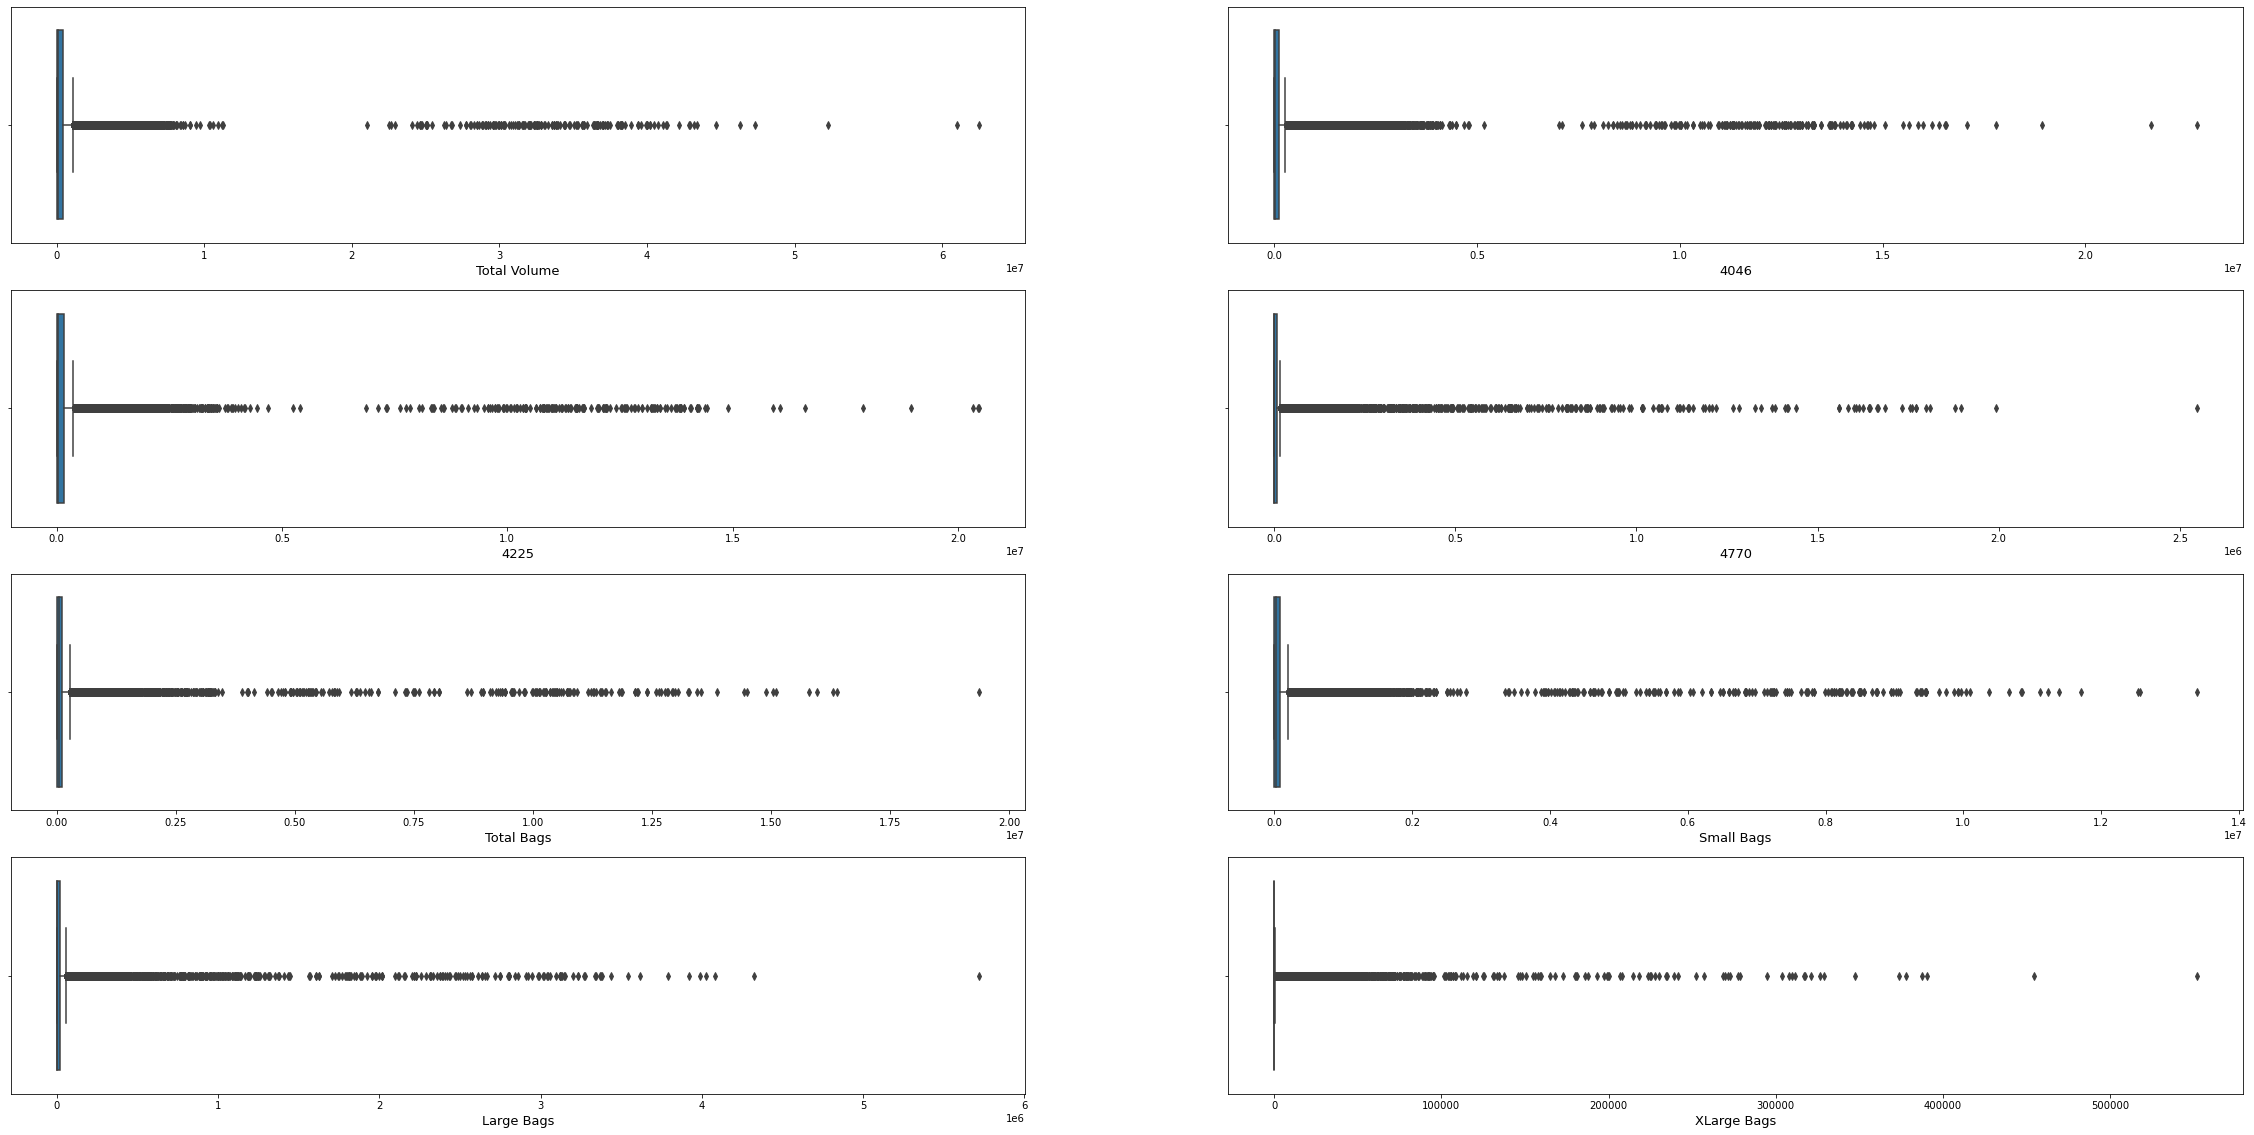

In [363]:
#Outliers/noise checking for input continuous feature columns
df_in = df[['Total Volume', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]
plt.figure(figsize=(40,20))
pltno = 1
for columns in df_in:
    if pltno <=16:
        ax = plt.subplot(4,2,pltno)
        sns.boxplot(x = df_in[columns])
        plt.xlabel(columns, fontsize=13)       
    pltno += 1
plt.show()

All input feature columns have outliers/noise

Need to be handled before training the model

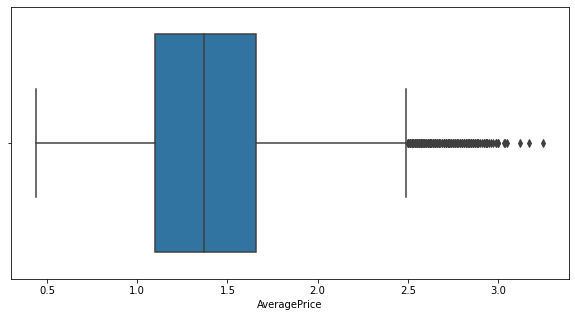

In [364]:
#Checking outliers in output/target column
plt.figure(figsize=(10,5))
sns.boxplot(x = df['AveragePrice'])
plt.show()

Target feature is also having noise/outliers

In [365]:
#Statistical summary of the data
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000


count is same in all coulmns

'Total Volume', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags' for all these columns interquartile range is showing higher jump, i.e in multiplicative orders of 10^2

This is due to higher outliers/noise in data

Also these data are highly right skewed

In [366]:
#Coefficient of correlation matrix
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050


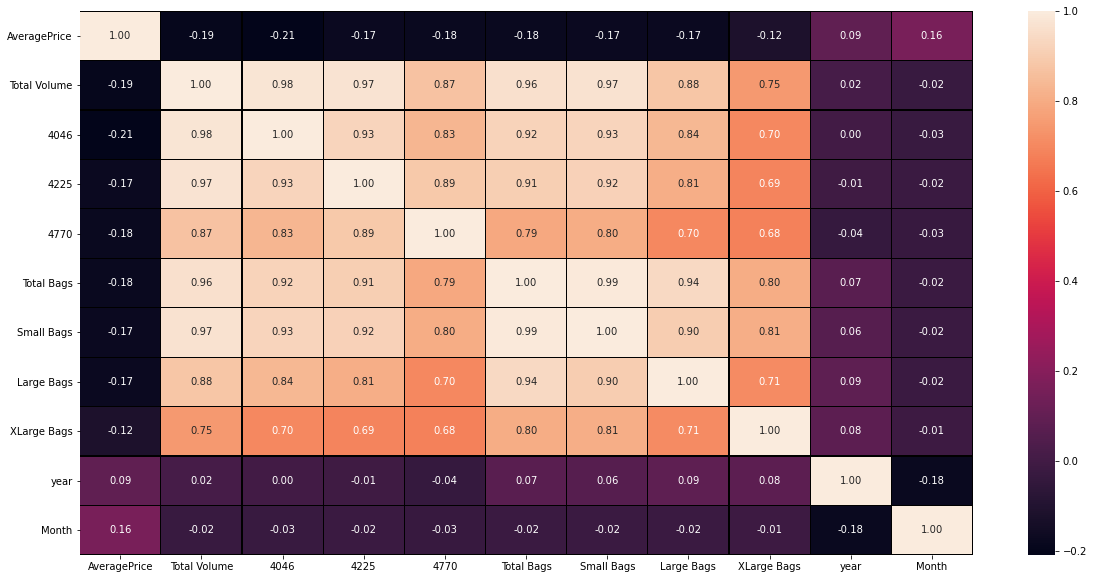

In [367]:
#Heatmap to vizualize correlation between different features
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, linecolor='black', fmt='0.2f')
plt.show()

'Total Volume', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags' for all these columns are showinh high degree of multicollinearity

Higher + ve coefficient of correlation among input continuous features themselves observed from correlation matrix

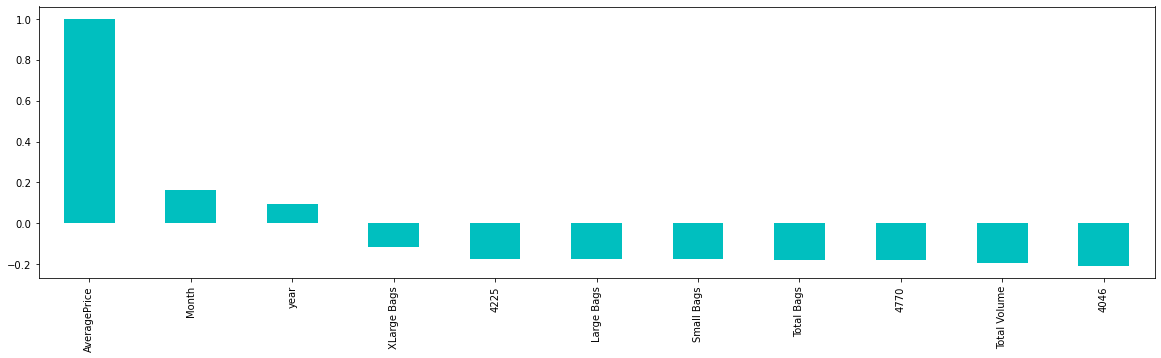

AveragePrice    1.000000
Month           0.162409
year            0.093197
XLarge Bags    -0.117592
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64

In [368]:
#Sorting descending values of correlation data of target variable
#Plotting the same for vizualization
plt.figure(figsize=(20,5))
df.corr()['AveragePrice'].sort_values(ascending=False).plot(kind='bar', color='c')
plt.show()

df.corr()['AveragePrice'].sort_values(ascending=False)

Encoding categorical data

Let us decompose date data into month, year and day

We have monh and year columns, we have left for date extraction

In [369]:
#creating one more column of date for monthly data analysis
df['Day'] = pd.DatetimeIndex(df['Date']).day
df = df.drop('Date', axis=1)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [370]:
#Let us encode type and region columns using label encoder
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['type'] = enc.fit_transform(df['type'].values.reshape(-1,1))
df['region'] = enc.fit_transform(df['region'].values.reshape(-1,1))

#Let us encode year by ordinal encoder
from sklearn.preprocessing import OrdinalEncoder
ore = OrdinalEncoder(categories = [[2015,2016,2017,2018]])
df['year'] = ore.fit_transform(df['year'].values.reshape(-1,1))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int32  
 10  year          18249 non-null  float64
 11  region        18249 non-null  int32  
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(10), int32(2), int64(2)
memory usage: 1.8 MB


All data is in numerical form now we can train and predict (apply ml algorithms)

Since we alsready now that the data is highly right skewed, we will proceed further only after reducing skewness by applying transformation principle

In [371]:
#Continuos feature columns name list
cont = ['Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags']

In [372]:
#Checking skewnessof continuous feature variables
df[cont].skew()

Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
dtype: float64

In [374]:
#Apply power transform to reduce skewness
from sklearn.preprocessing import PowerTransformer
po = PowerTransformer()
for col in cont:
    if df.skew().loc[col]>0.5:
        df[col] = po.fit_transform(df[col].values.reshape(-1,1))
        
#Again checking skewnessof continuous feature variables
df[cont].skew()

Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
dtype: float64

In [375]:
#Removing of outliers by zscore method
print('Shape before',df.shape)
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new = df[(z<3).all(axis=1)]
print('Shape after',df_new.shape)

Shape before (18249, 14)
Shape after (18025, 14)


In [376]:
#Percentage loss of data
loss = (df.shape[0]-df_new.shape[0])*100/(df.shape[0])
print(loss,'% loss of data')

1.2274645186037592 % loss of data


In [377]:
#1st angle of problem: AveragePrice prediction
#2nd angle of problem: Region prediction
#Seperate feature and target columns
x = df_new.drop(columns=['AveragePrice', 'region'], axis=1)
y1 = df_new['AveragePrice']
y2 = df_new['region']
print('x shape',x.shape)
print('y1 shape',y1.shape)
print('y2 shape',y2.shape)

x shape (18025, 12)
y1 shape (18025,)
y2 shape (18025,)


In [379]:
#VIF method to check multicollinearity 
#Checing for continuous input feature columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif = [variance_inflation_factor(x[cont].values,i) for i in range(x[cont].shape[1])]
vif

[48.389401825401116,
 6.760316761737804,
 10.822909961983164,
 3.6050917020119018,
 33.34477033288589,
 15.060239542835173,
 3.4010360956653054,
 1.8692339846809514]

VIF value is greater than 5 for 3 of the features, high degree of multicollinearity exists

In [380]:
#We need to scale the data before applying PCA technique to handle multicollinearity
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_new = sc.fit_transform(x)
x_new = pd.DataFrame(x_new, columns = x.columns)

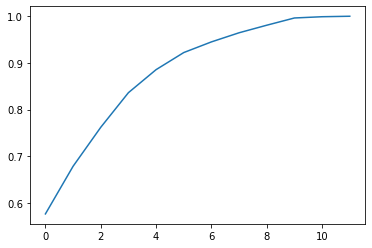

In [381]:
#PCA technique to handle multicollinearity
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(x_new)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

The explained_variance_ratio_ graph is saturating at approximately n = 9 from the above graph

In [387]:
pca = PCA(n_components=9)
new = pca.fit_transform(x_new)
PC = pd.DataFrame(new, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
x = PC

#Again checing VIF values
vif = pd.DataFrame()
vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
print('VIF = ',vif,'\n')

VIF =  [1.0000000000000004, 1.0, 1.0000000000000002, 0.9999999999999998, 1.0, 0.9999999999999996, 0.9999999999999996, 1.0, 1.0000000000000002] 



VIF is <5, hence issue of multicollinearity resolved

In [418]:
# Linear regression model
# Selection of best random state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
model = LinearRegression()
max_r2 = 0
for i in range(0,1000):
    xtr, xt, ytr, yt = train_test_split(x,y1, random_state=i,test_size=0.20)
    model.fit(xtr,ytr)
    predyt = model.predict(xt)
    r2 = r2_score(yt,predyt)
    
    if r2 > max_r2:
        max_r2 = r2
        print("Max r2 score =",max_r2)
        print("At RS =",i)

Max r2 score = 0.5045621033226511
At RS = 0
Max r2 score = 0.526024972558758
At RS = 1
Max r2 score = 0.5269770501712904
At RS = 4
Max r2 score = 0.5275224722360571
At RS = 8
Max r2 score = 0.5321194224578538
At RS = 12
Max r2 score = 0.5357798467792207
At RS = 18
Max r2 score = 0.5414830972248106
At RS = 49
Max r2 score = 0.5442426221262842
At RS = 107
Max r2 score = 0.5463464919209138
At RS = 512


In [438]:
#Splitting at best random state
xtr, xt, ytr, yt = train_test_split(x,y1, random_state=512,test_size=0.2)

#Training the model 
model = LinearRegression()
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test,'\n')
print('Mean absolute error =',mae,'\n')
print('Root mean squared error =',rme,'\n')

Test R2 score = 0.5463464919209138 

Mean absolute error = 0.210025770117607 

Root mean squared error = 0.2674481425169438 



In [439]:
#Cross validation to check overfitting
from sklearn.model_selection import cross_val_score
lsc = cross_val_score(model,x,y1,cv=5)
cvs = abs(lsc).mean()
print('At CV = 5')
print('CV score =',cvs)

At CV = 5
CV score = 0.31896331635025615


There is huge difference between CV score and R2 score of test, so model is overfitting

In [442]:
#Saving the results of model
model_result = pd.DataFrame(columns=['Algorithm name','Test r2 score', 'Mean abs error', 'Root mean squared error', 'CV score'])
model_result.loc[len(model_result.index)] = ['Linear regression', r2_test, mae, rme, cvs] 
model_result

,Algorithm name,Test r2 score,Mean abs error,Root mean squared error,CV score
0,Linear regression,0.546346,0.210026,0.267448,0.318963


In [443]:
# Decision tree regressor
# Selection of best random state
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
max_r2 = 0
for i in range(0,100):
    xtr, xt, ytr, yt = train_test_split(x,y1, random_state=i,test_size=0.20)
    model.fit(xtr,ytr)
    predyt = model.predict(xt)
    r2 = r2_score(yt,predyt)
    
    if r2 > max_r2:
        max_r2 = r2
        print("Max r2 score =",max_r2)
        print("At RS =",i)

Max r2 score = 0.6613319525949526
At RS = 0
Max r2 score = 0.6731317510539543
At RS = 6
Max r2 score = 0.6841617980930571
At RS = 20


In [445]:
#Splitting at best random state
xtr, xt, ytr, yt = train_test_split(x,y1, random_state=20,test_size=0.2)

#Training the model 
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test)
print('Mean absolute error =',mae)
print('Root mean squared error =',rme)

Test R2 score = 0.6731205923107515
Mean absolute error = 0.14821914008321774
Root mean squared error = 0.22350734659196891


In [458]:
#Cross validation to check overfitting
from sklearn.model_selection import cross_val_score
lsc = cross_val_score(model,x,y1,cv=5)
cvs = abs(lsc).mean()
print('At CV = 5')
print('CV score =',cvs)

At CV = 5
CV score = 0.5946934970504026


In [461]:
#Hyper parameter tuning of model
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':["squared_error", "absolute_error", "poisson"], 
              'max_depth':[2,4,6,8,10], 
              'splitter' : ["best", "random"],
              'random_state':[0,10,20,30,40]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

DecisionTreeRegressor(max_depth=10, random_state=10)


In [462]:
#Training the model at its best parameters
model = DecisionTreeRegressor(max_depth=10, random_state=10)
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test)
print('Mean absolute error =',mae)
print('Root mean squared error =',rme)

Test R2 score = 0.6897690304427164
Mean absolute error = 0.1603747074644053
Root mean squared error = 0.21774119229595693


In [472]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Decision tree regressor', r2_test, mae, rme, cvs] 
model_result

,Algorithm name,Test r2 score,Mean abs error,Root mean squared error,CV score
0,Linear regression,0.546346,0.210026,0.267448,0.318963
1,Decision tree regressor,0.689769,0.160375,0.217741,0.594693


In [477]:
# Lasso regression
# Selection of best random state
from sklearn.linear_model import Ridge
model = Ridge()
max_r2 = 0
for i in range(0,100):
    xtr, xt, ytr, yt = train_test_split(x,y1, random_state=i,test_size=0.20)
    model.fit(xtr,ytr)
    predyt = model.predict(xt)
    r2 = r2_score(yt,predyt)
    
    if r2 > max_r2:
        max_r2 = r2
        print("Max r2 score =",max_r2)
        print("At RS =",i)

Max r2 score = 0.5045656465946313
At RS = 0
Max r2 score = 0.5260274727708892
At RS = 1
Max r2 score = 0.5269744981233682
At RS = 4
Max r2 score = 0.5275174268101586
At RS = 8
Max r2 score = 0.5321130865021317
At RS = 12
Max r2 score = 0.5357828342570896
At RS = 18
Max r2 score = 0.5414867922204463
At RS = 49


In [478]:
#Splitting at best random state
xtr, xt, ytr, yt = train_test_split(x,y1, random_state=49,test_size=0.2)

#Training the model 
model = Ridge()
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test)
print('Mean absolute error =',mae)
print('Root mean squared error =',rme)

Test R2 score = 0.5414867922204463
Mean absolute error = 0.20235906996554565
Root mean squared error = 0.25768698947237295


In [479]:
#Cross validation to check overfitting
from sklearn.model_selection import cross_val_score
lsc = cross_val_score(model,x,y1,cv=5)
cvs = abs(lsc).mean()
print('At CV = 5')
print('CV score =',cvs)

At CV = 5
CV score = 0.31896561959543324


In [481]:
#Hyperparameter tuning of Ridge model
parameters = {'alpha':[0.01,0.1, 1,10], 
              'random_state':range(45,55,1), 
              'solver':['auto', 'svd', 'cholesky'],
              'max_iter':[1000,1500,2000]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

Ridge(alpha=10, max_iter=1000, random_state=45)


In [482]:
#Training the model at its best parameters
model = Ridge(alpha=10, max_iter=1000, random_state=45)
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test)
print('Mean absolute error =',mae)
print('Root mean squared error =',rme)

Test R2 score = 0.5415188607270142
Mean absolute error = 0.2023547986831783
Root mean squared error = 0.2576779779747004


In [486]:
#Cross validation to check overfitting
from sklearn.model_selection import cross_val_score
lsc = cross_val_score(model,x,y1,cv=5)
cvs = abs(lsc).mean()
print('At CV = 5')
print('CV score =',cvs)

At CV = 5
CV score = 0.3189860483590967


In [487]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Ridge regressor', r2_test, mae, rme, cvs] 
model_result

,Algorithm name,Test r2 score,Mean abs error,Root mean squared error,CV score
0,Linear regression,0.546346,0.210026,0.267448,0.318963
1,Decision tree regressor,0.689769,0.160375,0.217741,0.594693
2,Ridge regressor,0.541519,0.202355,0.257678,0.318986


In [488]:
# KNN regression
# Selection of best random state
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
max_r2 = 0
for i in range(0,100):
    xtr, xt, ytr, yt = train_test_split(x,y1, random_state=i,test_size=0.20)
    model.fit(xtr,ytr)
    predyt = model.predict(xt)
    r2 = r2_score(yt,predyt)
    
    if r2 > max_r2:
        max_r2 = r2
        print("Max r2 score =",max_r2)
        print("At RS =",i)

Max r2 score = 0.7672849637280992
At RS = 0
Max r2 score = 0.7703867292205139
At RS = 1
Max r2 score = 0.773653980311003
At RS = 2
Max r2 score = 0.7847661792611454
At RS = 3
Max r2 score = 0.7866823779595449
At RS = 6
Max r2 score = 0.7877025365647371
At RS = 45


In [489]:
#Splitting at best random state
xtr, xt, ytr, yt = train_test_split(x,y1, random_state=45,test_size=0.2)

#Training the model 
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test)
print('Mean absolute error =',mae)
print('Root mean squared error =',rme)

Test R2 score = 0.7877025365647371
Mean absolute error = 0.13267295423023578
Root mean squared error = 0.17948428819464354


In [501]:
#Cross validation to check overfitting
from sklearn.model_selection import cross_val_score
lsc = cross_val_score(model,x,y1,cv=3)
cvs = abs(lsc).mean()
print('At CV = 3')
print('CV score =',cvs)

At CV = 3
CV score = 0.6645334751154656


In [504]:
#Hyperparameter tuning of KNN model
parameters = {'n_neighbors':[4,5,6,7], 
              'weights':['uniform', 'distance'], 
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'metric':['minkowski']}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

KNeighborsRegressor(n_neighbors=6, weights='distance')


In [505]:
#Training the model at its best parameters
model = KNeighborsRegressor(n_neighbors=6, weights='distance')
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test)
print('Mean absolute error =',mae)
print('Root mean squared error =',rme)

Test R2 score = 0.7957147549234108
Mean absolute error = 0.12999330136676315
Root mean squared error = 0.17606479866710711


In [509]:
#Cross validation to check overfitting
from sklearn.model_selection import cross_val_score
lsc = cross_val_score(model,x,y1,cv=3)
cvs = abs(lsc).mean()
print('At CV = 3')
print('CV score =',cvs)

At CV = 3
CV score = 0.662364780876956


In [512]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['KNN regressor', r2_test, mae, rme, cvs] 
model_result

,Algorithm name,Test r2 score,Mean abs error,Root mean squared error,CV score
0,Linear regression,0.546346,0.210026,0.267448,0.318963
1,Decision tree regressor,0.689769,0.160375,0.217741,0.594693
2,Ridge regressor,0.541519,0.202355,0.257678,0.318986
3,KNN regressor,0.795715,0.129993,0.176065,0.662365


In [514]:
# Gradient boosting regressor
# Selection of best random state
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
max_r2 = 0
for i in range(0,10):
    xtr, xt, ytr, yt = train_test_split(x,y1, random_state=i,test_size=0.20)
    model.fit(xtr,ytr)
    predyt = model.predict(xt)
    r2 = r2_score(yt,predyt)
    
    if r2 > max_r2:
        max_r2 = r2
        print("Max r2 score =",max_r2)
        print("At RS =",i)

Max r2 score = 0.6800549186383724
At RS = 0
Max r2 score = 0.6919533633218898
At RS = 1
Max r2 score = 0.6934534721058175
At RS = 7
Max r2 score = 0.6966820662067561
At RS = 8


In [515]:
#Splitting at best random state
xtr, xt, ytr, yt = train_test_split(x,y1, random_state=8,test_size=0.2)

#Training the model 
model.fit(xtr,ytr)
predyt = model.predict(xt)
r2_test = r2_score(yt,predyt)
mae = mean_absolute_error(yt,predyt)
rme = np.sqrt(mean_squared_error(yt,predyt))
print('Test R2 score =',r2_test)
print('Mean absolute error =',mae)
print('Root mean squared error =',rme)

Test R2 score = 0.696708392762468
Mean absolute error = 0.1679255063718813
Root mean squared error = 0.21853183036759352


In [518]:
#Cross validation to check overfitting
from sklearn.model_selection import cross_val_score
lsc = cross_val_score(model,x,y1,cv=3)
cvs = abs(lsc).mean()
print('At CV = 3')
print('CV score =',cvs)

At CV = 3
CV score = 0.6268751436238182


In [ ]:
# Hyper parameter tuning of Gradient boosting regressor
parameters = {'criterion':['friedman_mse','mae','mse'],
              'n_estimators':[100,150,200], 
              'max_depth' : [4,6,8],
              'random_state':[2,4,6,8]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

Since the hyperparameter tuning is taking more time, let us save untuned results. The R2 score will improve after tuning the parameter.

In [520]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Gradient boost regressor', r2_test, mae, rme, cvs] 
model_result

,Algorithm name,Test r2 score,Mean abs error,Root mean squared error,CV score
0,Linear regression,0.546346,0.210026,0.267448,0.318963
1,Decision tree regressor,0.689769,0.160375,0.217741,0.594693
2,Ridge regressor,0.541519,0.202355,0.257678,0.318986
3,KNN regressor,0.795715,0.129993,0.176065,0.662365
4,Gradient boost regressor,0.696708,0.167926,0.218532,0.626875


In [521]:
model_result['CV-R2 difference'] = model_result['Test r2 score'] - model_result['CV score']
model_result

,Algorithm name,Test r2 score,Mean abs error,Root mean squared error,CV score,CV-R2 difference
0,Linear regression,0.546346,0.210026,0.267448,0.318963,0.227383
1,Decision tree regressor,0.689769,0.160375,0.217741,0.594693,0.095076
2,Ridge regressor,0.541519,0.202355,0.257678,0.318986,0.222533
3,KNN regressor,0.795715,0.129993,0.176065,0.662365,0.133350
4,Gradient boost regressor,0.696708,0.167926,0.218532,0.626875,0.069833


The least difference between R2 test score and CV score observed in Gradient boost regressor model

Let us select this model

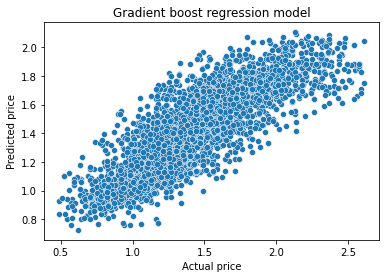

In [528]:
#Visualizing the predicted vs actual result of test data
sns.scatterplot(x=yt, y=predyt)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Gradient boost regression model')
plt.show()

In [529]:
import pickle
filename='avocado_price.pkl'
pickle.dump(model,open(filename,'wb'))

Second angle of problem (Classification)

Prediction of region

input = x

target = y2

In [531]:
#Logistic regression
#Best randm state selection
max_acc = 0
max_RS = 0
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
lr = LogisticRegression()
for i in range(0,50):
    xtr, xt, ytr, yt = train_test_split(x,y2, random_state=i,test_size=0.2)
    lr.fit(xtr, ytr)
    predyt = lr.predict(xt)
    accuracy = accuracy_score(yt,predyt)  
    if accuracy > max_acc:
        max_acc = accuracy
        max_RS = i
        print('At Max RS',i,'Max Accuracy =',accuracy)

At Max RS 0 Max Accuracy = 0.3808599167822469
At Max RS 1 Max Accuracy = 0.39389736477115117
At Max RS 11 Max Accuracy = 0.39528432732316227
At Max RS 13 Max Accuracy = 0.3955617198335645


In [532]:
def metric_score(model, xtr, xt, ytr, yt, train=True):
    if train:
        ypr = model.predict(xtr)
        print(f"Accuracy score of train is : {(accuracy_score(ytr, ypr))*100:.2f}%")
        
    elif train==False:
        ypr = model.predict(xt)
        print(f"Accuracy score of test is : {(accuracy_score(yt, ypr))*100:.2f}%",'\n\nClassification report:')
        print(classification_report(yt, ypr))

In [533]:
#Using best random state for train test split
xtr, xt, ytr, yt = train_test_split(x,y2, random_state=13,test_size=0.2)
#Training the model
model = LogisticRegression()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 38.77%
Accuracy score of test is : 39.56% 

Classification report:
              precision    recall  f1-score   support

           0       0.42      0.49      0.46        67
           1       0.19      0.32      0.24        57
           2       0.56      0.65      0.60        71
           3       0.40      0.33      0.36        60
           4       0.30      0.32      0.31        66
           5       0.25      0.24      0.25        66
           6       0.79      0.91      0.84        77
           7       0.36      0.52      0.43        62
           8       0.60      0.84      0.70        63
           9       0.34      0.52      0.41        65
          10       0.31      0.25      0.28        71
          11       0.32      0.40      0.36        62
          12       0.35      0.55      0.42        75
          13       0.19      0.20      0.20        66
          14       0.40      0.38      0.39        81
          15       0.45      0.49      

In [560]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
lsc = cross_val_score(model,x,y2,cv=9)
cvs = lsc.mean()
print('CV score =',cvs)

Accuracy score: 0.3955617198335645
CV score = 0.3117872032000839


Since target is not binary, it is multiclass we cannot use ROC AUC as metrics

In [568]:
#Saving the results of model
model_result = pd.DataFrame(columns=['Algorithm name','Accuracy f1 score test' ,'CV score'])
model_result.loc[len(model_result.index)] = ['Logistic regression', acc, cvs] 
model_result

,Algorithm name,Accuracy f1 score test,CV score
0,Logistic regression,0.395562,0.311787


In [569]:
#Decision tree classifier
#Best randm state selection
max_acc = 0
max_RS = 0
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
for i in range(0,50):
    xtr, xt, ytr, yt = train_test_split(x,y2, random_state=i,test_size=0.2)
    lr.fit(xtr, ytr)
    predyt = lr.predict(xt)
    accuracy = accuracy_score(yt,predyt)  
    if accuracy > max_acc:
        max_acc = accuracy
        max_RS = i
        print('At Max RS',i,'Max Accuracy =',accuracy)

At Max RS 0 Max Accuracy = 0.3808599167822469
At Max RS 1 Max Accuracy = 0.39389736477115117
At Max RS 11 Max Accuracy = 0.39528432732316227
At Max RS 13 Max Accuracy = 0.3955617198335645


In [570]:
#Using best random state for train test split
xtr, xt, ytr, yt = train_test_split(x,y2, random_state=13,test_size=0.2)
#Training the model
model = DecisionTreeClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 100.00%
Accuracy score of test is : 70.68% 

Classification report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.74        67
           1       0.57      0.56      0.57        57
           2       0.85      0.66      0.75        71
           3       0.71      0.73      0.72        60
           4       0.67      0.70      0.68        66
           5       0.59      0.67      0.63        66
           6       0.88      0.86      0.87        77
           7       0.72      0.77      0.74        62
           8       0.84      0.81      0.82        63
           9       0.66      0.74      0.70        65
          10       0.53      0.56      0.55        71
          11       0.73      0.82      0.77        62
          12       0.76      0.68      0.72        75
          13       0.60      0.59      0.60        66
          14       0.76      0.63      0.69        81
          15       0.84      0.88     

In [590]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
lsc = cross_val_score(model,x,y2,cv=10)
cvs = lsc.mean()
print('CV score =',cvs)

Accuracy score: 0.7067961165048544
CV score = 0.5639944521497919


In [591]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Decision tree classifier', acc, cvs] 
model_result

,Algorithm name,Accuracy f1 score test,CV score
0,Logistic regression,0.395562,0.311787
1,Decision tree classifier,0.706796,0.563994


In [592]:
#Support vector machine classifier
from sklearn.svm import SVC
model = SVC()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 76.65%
Accuracy score of test is : 72.07% 

Classification report:
              precision    recall  f1-score   support

           0       0.66      0.94      0.77        67
           1       0.54      0.51      0.52        57
           2       0.90      0.92      0.91        71
           3       0.79      0.73      0.76        60
           4       0.89      0.77      0.83        66
           5       0.83      0.61      0.70        66
           6       0.90      0.97      0.94        77
           7       0.71      0.66      0.68        62
           8       0.87      0.87      0.87        63
           9       0.56      0.68      0.62        65
          10       0.51      0.49      0.50        71
          11       0.84      0.82      0.83        62
          12       0.79      0.80      0.79        75
          13       0.53      0.50      0.52        66
          14       0.81      0.80      0.81        81
          15       0.86      0.93      

In [595]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
lsc = cross_val_score(model,x,y2,cv=10)
cvs = lsc.mean()
print('CV score =',cvs)

Accuracy score: 0.7206657420249654
CV score = 0.6095282988089281


In [ ]:
# Hyper parameter tuning for svc model
from sklearn.model_selection import GridSearchCV
parameters = {'gamma':['scale', 'auto'],
              'max_iter':[100,150,200],
              'kernel':["linear", "poly", "rbf"],
              'tol':[0.0001,0.001,0.01]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

In [ ]:
#Training for best parameters
model = gsv.best_estimator
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)

In [598]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Support vector classifier', acc, cvs] 
model_result

,Algorithm name,Accuracy f1 score test,CV score
0,Logistic regression,0.395562,0.311787
1,Decision tree classifier,0.706796,0.563994
2,Support vector classifier,0.720666,0.609528


In [601]:
#K nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)

Accuracy score of train is : 75.82%
Accuracy score of test is : 56.09% 

Classification report:
              precision    recall  f1-score   support

           0       0.56      0.87      0.68        67
           1       0.19      0.37      0.25        57
           2       0.62      0.87      0.73        71
           3       0.50      0.60      0.55        60
           4       0.65      0.77      0.70        66
           5       0.51      0.56      0.53        66
           6       0.78      0.87      0.82        77
           7       0.40      0.66      0.50        62
           8       0.67      0.73      0.70        63
           9       0.36      0.46      0.40        65
          10       0.25      0.35      0.29        71
          11       0.61      0.76      0.68        62
          12       0.77      0.65      0.71        75
          13       0.41      0.29      0.34        66
          14       0.79      0.75      0.77        81
          15       0.62      0.85      

In [612]:
print('Accuracy score:',acc)
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
lsc = cross_val_score(model,x,y2,cv=7)
cvs = lsc.mean()
print('CV score =',cvs)

Accuracy score: 0.560887656033287
CV score = 0.43295423023578355


In [ ]:
# Hyper parameter tuning for KNN model
from sklearn.model_selection import GridSearchCV
parameters = { 'n_neighbors':range(3,10,1), 
              'weights':['uniform','distance'], 
              'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute'], 
              'leaf_size':[25,30,35]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

In [ ]:
#Training for best parameters
model = gsv.best_estimator
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)

In [614]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['KNN classifier', acc, cvs] 
model_result

,Algorithm name,Accuracy f1 score test,CV score
0,Logistic regression,0.395562,0.311787
1,Decision tree classifier,0.706796,0.563994
2,Support vector classifier,0.720666,0.609528
3,KNN classifier,0.560888,0.432954


In [615]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)

Accuracy score of train is : 100.00%
Accuracy score of test is : 85.35% 

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        67
           1       0.73      0.75      0.74        57
           2       0.94      0.92      0.93        71
           3       0.84      0.78      0.81        60
           4       0.94      0.89      0.91        66
           5       0.89      0.77      0.83        66
           6       0.94      0.97      0.96        77
           7       0.78      0.95      0.86        62
           8       0.89      0.92      0.91        63
           9       0.80      0.80      0.80        65
          10       0.81      0.76      0.78        71
          11       0.86      0.92      0.89        62
          12       0.89      0.88      0.89        75
          13       0.82      0.80      0.81        66
          14       0.89      0.84      0.87        81
          15       0.93      0.93     

In [621]:
print('Accuracy score:',acc)
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
lsc = cross_val_score(model,x,y2,cv=9)
cvs = lsc.mean()
print('CV score =',cvs)

Accuracy score: 0.8535367545076283
CV score = 0.6488193672417337


In [ ]:
# Hyper parameter tuning for random forest model
from sklearn.model_selection import GridSearchCV
parameters = { 'n_estimators':[100,125,150], 
              'criterion':["gini", "entropy"], 
              'max_depth' :[5, 10, 15], 
              'max_features':["auto", "sqrt", "log2"]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

In [ ]:
#Training for best parameters
model = gsv.best_estimator
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)

In [ ]:
print('Accuracy score:',acc)
#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
lsc = cross_val_score(model,x,y2,cv=7)
cvs = lsc.mean()
print('CV score =',cvs)

In [623]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Random forest classifier', acc, cvs] 
model_result

,Algorithm name,Accuracy f1 score test,CV score
0,Logistic regression,0.395562,0.311787
1,Decision tree classifier,0.706796,0.563994
2,Support vector classifier,0.720666,0.609528
3,KNN classifier,0.560888,0.432954
4,Random forest classifier,0.853537,0.648819


In [624]:
model_result['CV-ACC difference'] = model_result['Accuracy f1 score test'] - model_result['CV score']
model_result

,Algorithm name,Accuracy f1 score test,CV score,CV-ACC difference
0,Logistic regression,0.395562,0.311787,0.083775
1,Decision tree classifier,0.706796,0.563994,0.142802
2,Support vector classifier,0.720666,0.609528,0.111137
3,KNN classifier,0.560888,0.432954,0.127933
4,Random forest classifier,0.853537,0.648819,0.204717


Random forest model is giving best accuracy f1 score

The difference between CV score and accuracy is 0.2, suggesting that model is overfitting

#Please Note: As the dataset is too big and my current laptop unable to run hyper parameter tuning command.

I am saving the model, without parameter tuning for random forest regressor

In [626]:
table = pd.DataFrame()
table['Actuall region'] = yt
table['Predicted predicted'] = ypr
table.sample(10)

,Actuall region,Predicted predicted
7387,33,33
6157,10,39
16880,40,40
9526,7,7
17412,50,50
2077,39,39
10850,33,33
656,12,12
5588,53,53
15512,14,23


In [627]:
import pickle
filename='Avocado_region.pkl'
pickle.dump(model,open(filename,'wb'))